In [1]:
# P2 - Analisando dados dos passageiros do Titanic
# Por Nikolas Thorun
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregando o arquivo para dentro da variável
# utilizarei o DataFrame porque, ao importar os dados, as colunas não vêm apenas com tipos 'string'; isso facilita a parte
# de limpeza, pois não precisarei mudar os tipos das colunas.
titanic_pd = pd.read_csv('D:/Udacity/P2/titanic_data.csv')

# Antes de começar a explorar os dados, quais informações quero saber?
# Qual é a média de idade dos passageiros?
# A média de idade dos passageiros, separada por sexo?
# Qual a proporção entre sobreviventes e não sobreviventes?
# Há diferença significativa nas proporções de sobreviventes entre os sexos?
# Os passageiros da primeira classe tiveram a maior proporção de sobreviventes?
# Existe relação entre idade e preço dos tickets? Ou seja, as pessoas mais velhas têm mais dinheiro para comprar 
# passagens mais caras?

In [3]:
# Contando o total de passageiros e os passageiros que tem o campo 'idade' preenchido
print titanic_pd['PassengerId'].count()
print titanic_pd['Age'].count()

891
714


In [4]:
# No DataFrame importado, temos 891 passageiros, porém somente 714 possuem o campo de idade preenchido
# Existem pessoas com a idade estimada, mas usarei as idades estimadas como estão para não diminuir mais o número da amostra
# Não mudarei o tipo da coluna "Survived" para booleano, pois o usarei para indicar a proporção de sobreviventes

# LIMPEZA DE DADOS
# Remove apenas os passageiros sem idade descrita
titanic_pd = titanic_pd[np.isfinite(titanic_pd['Age'])]

In [5]:
# conferindo os valores pra ver se batem
len(titanic_pd)
# ok, agora tenho todos os 714 passageiros que possuem idade descrita, mesmo que estimada

714

In [6]:
# Qual é a média de idade dos passageiros? Qual é a proporção de sobreviventes?
titanic_pd.describe()
# Média de idade dos passageiros: aproximadamente 30 anos
# Poporção de sobreviventes: 0.40, ou 40%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


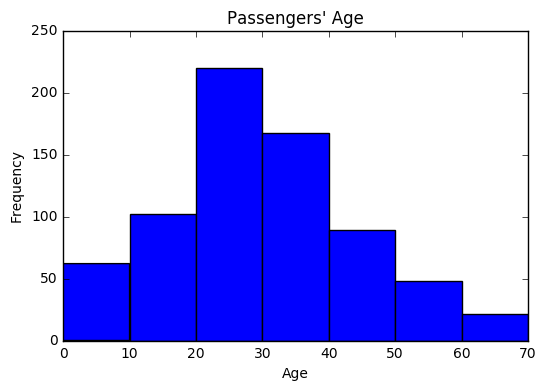

In [7]:
# Qual é a frequência de passageiros, por faixa de idade?
# O histograma abaixo mostra a distribuição de idade dos passageiros por faixas de 10 anos.
plt.hist(titanic_pd['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70])
plt.title("Passengers' Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Qual é o número de passageiros por sexo?
# Qual são as médias de idade dos homens e das mulheres?
print titanic_pd['PassengerId'].groupby(titanic_pd['Sex']).count()
titanic_pd['Age'].groupby(titanic_pd['Sex']).mean()
# Média das 261 Mulheres: Aproximadamente 28 anos
# Média dos 453 Homens: Aproximadamente 31 anos

Sex
female    261
male      453
Name: PassengerId, dtype: int64


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [9]:
# Separando os passageiros entre sobreviventes e não sobreviventes e verificando os números
survived = titanic_pd.loc[titanic_pd['Survived']==1]
died = titanic_pd.loc[titanic_pd['Survived']==0]
print len(survived)
print len(died)
# 290/(290+424) = 0.40, está correto

290
424


In [10]:
# Qual é a média de idade entre os sobreviventes?
survived.describe()
# aproximadamente 28 anos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000
mean,457.768966,1.0,1.872414,28.343690,0.493103,0.527586,51.843205
std,250.845515,0.0,0.836617,14.950952,0.731132,0.807147,70.458776
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,260.500000,1.0,1.000000,19.000000,0.000000,0.000000,13.000000
50%,452.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.250000
75%,669.500000,1.0,3.000000,36.000000,1.000000,1.000000,66.200000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [11]:
# Qual é a média de idade entre os não sobreviventes?
died.describe()
# aproximadamente 31 anos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.000000
mean,442.299528,0.0,2.485849,30.626179,0.525943,0.365566,22.965456
std,264.739548,0.0,0.743633,14.172110,1.044760,0.878341,31.448825
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,200.750000,0.0,2.000000,21.000000,0.000000,0.000000,7.895800
50%,436.000000,0.0,3.000000,28.000000,0.000000,0.000000,11.887500
75%,683.250000,0.0,3.000000,39.000000,1.000000,0.000000,26.550000
max,891.000000,0.0,3.000000,74.000000,5.000000,6.000000,263.000000


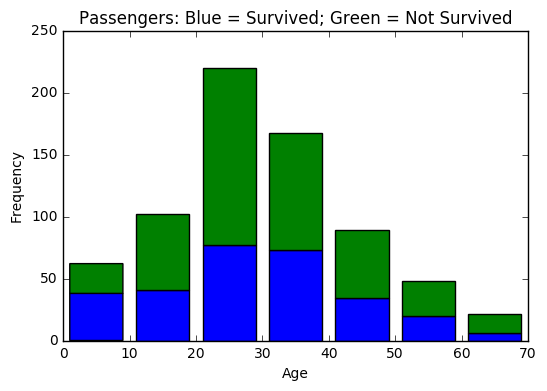

In [12]:
# Qual é a proporção de sobreviventes e não sobreviventes, por faixa de idade?
# O histograma abaixo mostra a distribuição de idade dos passageiros por faixas de 10 anos agrupados por
# sobreviventes/não sobreviventes
x1 = survived['Age']
x2 = died['Age']
plt.hist([x1,x2], bins=[0, 10, 20, 30, 40, 50, 60, 70], stacked=True)
plt.title("Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Dividindo os grupos de sobreviventes e não sobreviventes por sexo
survived_men = survived.loc[survived['Sex']=="male"]
survived_women = survived.loc[survived['Sex']=="female"]
died_men = died.loc[died['Sex']=="male"]
died_women = died.loc[died['Sex']=="female"]

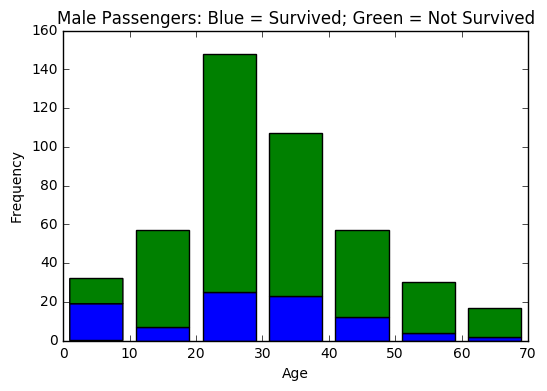

In [14]:
# Há diferença significativa nas proporções de sobreviventes entre os sexos?
# O histograma abaixo mostra a distribuição de idade dos passageiros homens por faixas de 10 anos agrupados por
# sobreviventes/não sobreviventes
x1 = survived_men['Age']
x2 = died_men['Age']
plt.hist([x1,x2], bins=[0, 10, 20, 30, 40, 50, 60, 70], stacked=True)
plt.title("Male Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

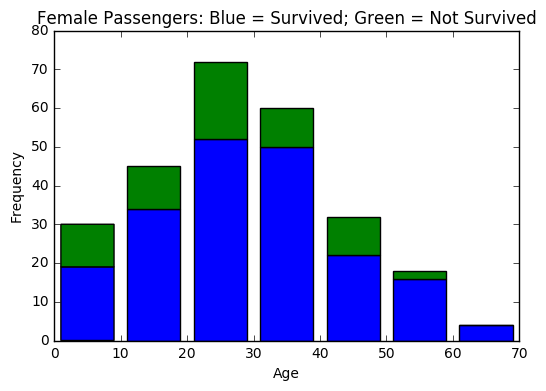

In [15]:
# O histograma abaixo mostra a distribuição de idade das passageiras mulheres por faixas de 10 anos agrupados por
# sobreviventes/não sobreviventes
x1 = survived_women['Age']
x2 = died_women['Age']
plt.hist([x1,x2], bins=[0, 10, 20, 30, 40, 50, 60, 70], stacked=True)
plt.title("Female Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Os gráficos acima dão uma idéia de proporção, mas para termos uma idéia em números absolutos, teríamos que somar
# os números de cada subdivisão
# Para ver o número de homens e mulheres agrupados por sobreviventes e não sobreviventes:
print "Homens sobreviventes: " , len(survived_men)
print "Mulheres sobreviventes: " , len(survived_women)
print "Homens que morreram: " , len(died_men)
print "Mulheres que morreram: " , len(died_women)
# A proporção de mulheres sobreviventes é 2x maior que a de homens sobreviventes
# Por isso a média de idade entre os sobreviventes é mais parecida com a média de idade das mulheres
# E a média de idade entre os não sobreviventes é mais parecida com a média de idade dos homens

Homens sobreviventes:  93
Mulheres sobreviventes:  197
Homens que morreram:  360
Mulheres que morreram:  64


In [17]:
# Média de sobreviventes por sexo - Para termos uma idéia em números relativos
titanic_pd['Survived'].groupby(titanic_pd['Sex']).mean()
# Apenas 20% dos homens sobreviveram
# Enquanto 75% das mulheres sobreviveram
# Por que?
# É possível que tenham dado preferência para mulheres e crianças na hora de embarcarem nos botes salva-vidas

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

In [18]:
# Dentre as crianças, quantas sobreviveram e quantas morreram?
# E de quais classes elas eram?
print "Crianças sobreviventes: ",survived['PassengerId'][survived['Age']<=14].count()
print "Crianças não sobreviventes: ",died['PassengerId'][died['Age']<=14].count()
print "Sobreviventes agrupados por classe: ",survived['PassengerId'][survived['Age']<=14].groupby(titanic_pd['Pclass']).count()
print "Não sobreviventes agrupados por classe: ",died['PassengerId'][died['Age']<=14].groupby(titanic_pd['Pclass']).count()
print "Sobreviventes agrupados por sexo: ",survived['PassengerId'][survived['Age']<=14].groupby(titanic_pd['Sex']).count()
print "Não sobreviventes agrupados por sexo: ",died['PassengerId'][died['Age']<=14].groupby(titanic_pd['Sex']).count()
# Parece mesmo que as crianças ganharam prioridade para embarcar nos botes,
# podemos ver que a porcentagem de crianças sobreviventes é de quase 60%, sendo que a maioria dos não sobreviventes
# era da terceira classe. Como a terceira classe era a parte mais baixa do navio, é possível que boa parte dessas crianças
# não tenha nem mesmo conseguido chegar ao convés, que era onde ficavam os botes.
# a proporção de sobreviventes por sexo entre as crianças prova isso, 21 meninos e 24 meninas.
# Enquanto entre os adultos, 93 homens e 197 mulheres

Crianças sobreviventes:  45
Crianças não sobreviventes:  32
Sobreviventes agrupados por classe:  Pclass
1     4
2    19
3    22
Name: PassengerId, dtype: int64
Não sobreviventes agrupados por classe:  Pclass
1     1
3    31
Name: PassengerId, dtype: int64
Sobreviventes agrupados por sexo:  Sex
female    24
male      21
Name: PassengerId, dtype: int64
Não sobreviventes agrupados por sexo:  Sex
female    14
male      18
Name: PassengerId, dtype: int64


In [19]:
# Voltando aos passageiros do Titanic como um todo:
# Os passageiros da primeira classe tiveram a maior proporção de sobreviventes?
# Média de sobreviventes por Classe
print "Proporção de sobreviventes por classe: ",titanic_pd['Survived'].groupby(titanic_pd['Pclass']).mean()
print "Número de passageiros por classe: ",titanic_pd['Survived'].groupby(titanic_pd['Pclass']).count()
# As classes eram divididas da seguinte maneira no Titanic:
# Nos andares mais próximos ao convés, ficava a primeira classe
# Nos andares inferiores, mais próximos à casa de máquinas, ficava a terceira classe
# E nos andares intermediários, a segunda classe
# Como mostra a imagem: https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/400px-Titanic_cutaway_diagram.png

# Por estarem mais próximas ao convés, faz sentido a proporção de sobreviventes entre as classes superiores ser maior.

Proporção de sobreviventes por classe:  Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64
Número de passageiros por classe:  Pclass
1    186
2    173
3    355
Name: Survived, dtype: int64


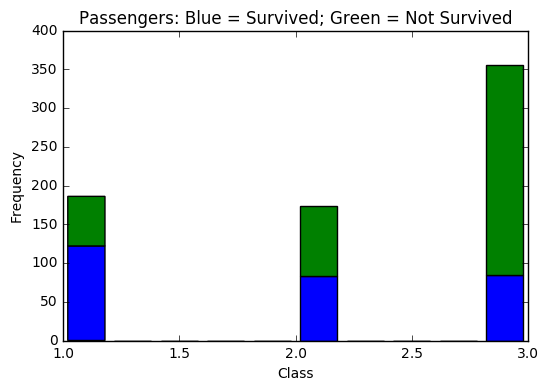

In [20]:
# O histograma abaixo mostra a proporção de sobreviventes por classe
# A soma dos compartimentos significa o número absoluto de passageiros por classe
x1 = survived['Pclass']
x2 = died['Pclass']
plt.hist([x1,x2], stacked=True)
plt.title("Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Números absolutos de sobreviventes homens por classe
survived_men['Survived'].groupby(titanic_pd['Pclass']).sum()

Pclass
1    40
2    15
3    38
Name: Survived, dtype: int64

In [22]:
# Números absolutos de sobreviventes mulheres por Classe
survived_women['Survived'].groupby(titanic_pd['Pclass']).sum()

Pclass
1    82
2    68
3    47
Name: Survived, dtype: int64

In [23]:
# Números absolutos de passageiros por cidade de embarque
titanic_pd['PassengerId'].groupby(titanic_pd['Embarked']).count()

Embarked
C    130
Q     28
S    554
Name: PassengerId, dtype: int64

In [24]:
# Média de sobrevivente por cidade de embarque
titanic_pd['Survived'].groupby(titanic_pd['Embarked']).mean()

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

In [25]:
# Média do preço da passagem por cidade de embarque
titanic_pd['Fare'].groupby(titanic_pd['Embarked']).mean()

Embarked
C    68.296767
Q    18.265775
S    27.476284
Name: Fare, dtype: float64

In [26]:
# Com as informações acima podemos ter uma certa noção que Southampton é a cidade mais populosa; 
# Queenstown é a cidade mais pobre e Cherbourg a cidade mais rica
# Vamos olhar mais a fundo?
# Distribuição de passageiros por Classe, na cidade de Cherbourg
titanic_pd['PassengerId'][titanic_pd['Embarked']=="C"].groupby(titanic_pd["Pclass"]).count()
# Porcentagem de passageiros da primeira classe = 56%

Pclass
1    74
2    15
3    41
Name: PassengerId, dtype: int64

In [27]:
# Distribuição de passageiros por Classe, na cidade de Queenstown
titanic_pd['PassengerId'][titanic_pd['Embarked']=="Q"].groupby(titanic_pd["Pclass"]).count()
# Porcentagem de passageiros da terceira classe = 85%

Pclass
1     2
2     2
3    24
Name: PassengerId, dtype: int64

In [28]:
# Distribuição de passageiros por Classe, na cidade de Southampton
titanic_pd['PassengerId'][titanic_pd['Embarked']=="S"].groupby(titanic_pd["Pclass"]).count()
# Porcentagem de passageiros da primeira classe = 20%
# Com isso, confirmamos que Southampton é a cidade mais populosa; Cherbourg a cidade mais elitizada;
# e Queenstown a cidade mais pobre e/ou menos populosa

Pclass
1    108
2    156
3    290
Name: PassengerId, dtype: int64

In [29]:
# Fazer correlação entre idade e preço da passagem
df = pd.read_csv('D:/Udacity/P2/titanic_data.csv', usecols=[5,9])
df.corr()
# 0.096 significa que não há correlação entre as variáveis Idade e Preço da passagem
# Eu imaginei que as pessoas mais velhas comprariam tickets mais caros
# Vamos ver num gráfico de dispersão?

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


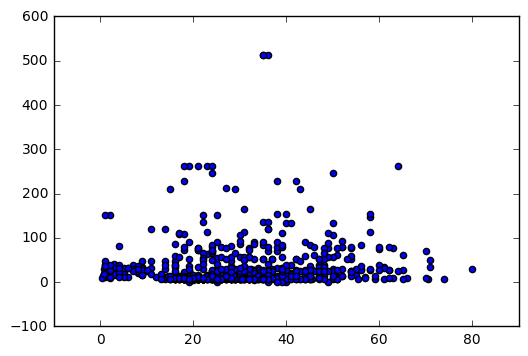

In [30]:
plt.scatter(df['Age'],df['Fare'])
plt.show()
# É.. realmente as duas variáveis não possuem relação

In [31]:
# Qual foi o grupo de pelo menos 20 pessoas, com a maior proporção de sobreviventes?
print titanic_pd['Survived'][titanic_pd['Embarked']=="C"][titanic_pd["Sex"]=="female"][titanic_pd["Pclass"]==1][titanic_pd["Age"]<>50].mean()
print titanic_pd['Survived'][titanic_pd['Embarked']=="C"][titanic_pd["Sex"]=="female"][titanic_pd["Pclass"]==1][titanic_pd["Age"]<>50].count()
# Todas as 36 mulheres que embarcaram na primeira classe em Cherbourg e tinham idade diferente de 50 anos, sobreviveram.

1.0
36


In [32]:
# Qual foi o grupo de pelo menos 20 pessoas, com a menor proporção de sobreviventes?
print titanic_pd['Survived'][titanic_pd['Embarked']=="S"][titanic_pd["Sex"]=="male"][titanic_pd["Pclass"]==3][titanic_pd["Age"]>=40].mean()
print titanic_pd['Survived'][titanic_pd['Embarked']=="S"][titanic_pd["Sex"]=="male"][titanic_pd["Pclass"]==3][titanic_pd["Age"]>=40].count()
# Dos 29 homens que embarcaram na terceira classe em Southampton, apenas 2 sobreviveram

0.0689655172414
29


In [33]:
# Nota: 
# A proporção entre homens e mulheres no navio me deixou em dúvida se havia pessoas da tripulação no meio dos dados
# Como todos os passageiros possuíam classe, inferi que todos eram passageiros e não tripulantes
# Não consegui pensar em um motivo para haver tantos homens a mais do que mulheres no navio